<a href="https://colab.research.google.com/github/Icee21/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [3]:
filename = '/content/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


How many rows and columns?

In [4]:
len(df)

print(f'Total rows {len(df)}')

Total rows 8523


In [5]:
len(df.columns)

print(f'Total columns {len(df.columns)}')

Total columns 12


What are the datatypes of each variable?

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there duplicates? If so, drop any duplicates

In [7]:
df.duplicated().any()

False

In [8]:
df.duplicated().sum()

0

Identify missing values.

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
iw_mean = df['Item_Weight'].mean()

In [11]:
# I filled in the missing value of "Item Weight" by using the average value of that column
df['Item_Weight'] = df['Item_Weight'].fillna(iw_mean)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
outlet_size_missing_values = df['Outlet_Size'].mode()
outlet_size_missing_values

0    Medium
Name: Outlet_Size, dtype: object

In [14]:
# for the value "Outlet Size" I used the Mode value of that feature and that is (Medium)
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
df['Outlet_Type'].replace({'Grocery Store' : 'Supermarket Type1'}, inplace = True)

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    6660
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Confirm that there are no missing values after addressing them

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and fix any inconsistent categories of data

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [25]:
filter_1 = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values().reset_index()
fig = px.bar(filter_1, y='Item_Outlet_Sales', x='Item_Type')

fig.show();


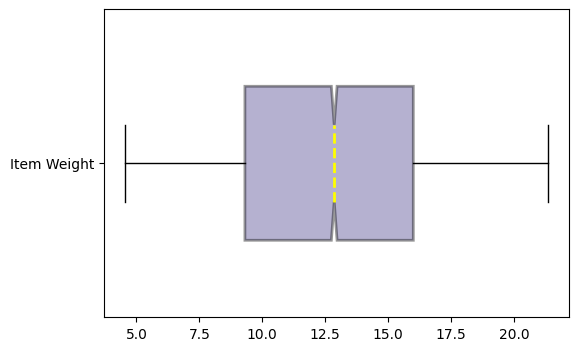

In [26]:
item_1 = df['Item_Weight']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
boxplots = axes.boxplot([item_1],
                        notch = True,
                        labels = ['Item Weight'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='darkslateblue', alpha = .4));

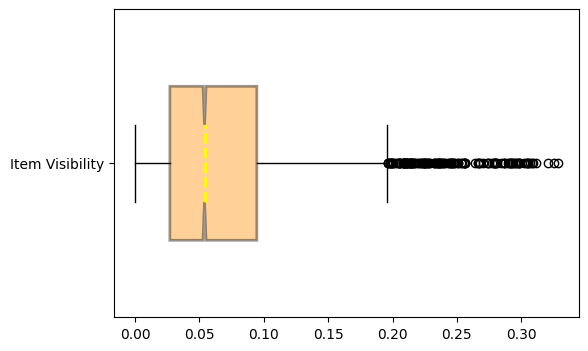

In [27]:
item_2 = df['Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
boxplots = axes.boxplot([item_2],
                        notch = True,
                        labels = ['Item Visibility'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='darkorange', alpha = .4));

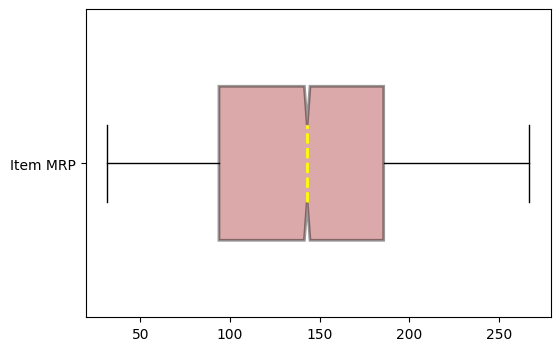

In [28]:
item_3 = df['Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
boxplots = axes.boxplot([item_3],
                        notch = True,
                        labels = ['Item MRP'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='brown', alpha = .4));

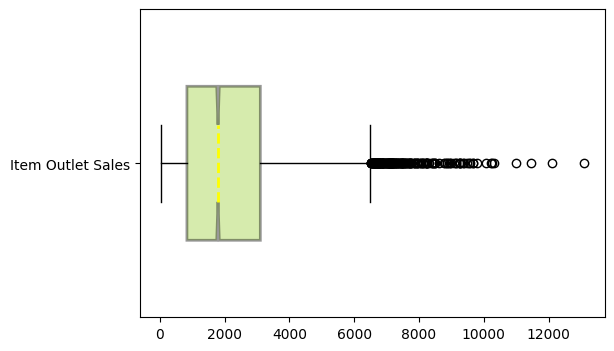

In [29]:
item_4 = df['Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
boxplots = axes.boxplot([item_4],
                        notch = True,
                        labels = ['Item Outlet Sales'],
                        widths = .5,
                        patch_artist = True,
                        vert = False,
                        medianprops = dict(linestyle = '--', linewidth = 2, color ='Yellow'),
                        boxprops = dict( linestyle = '--', linewidth = 2, color = 'black', facecolor='yellowgreen', alpha = .4));

In [30]:
corr = df.corr()
corr

<ipython-input-30-4381f08f6434>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

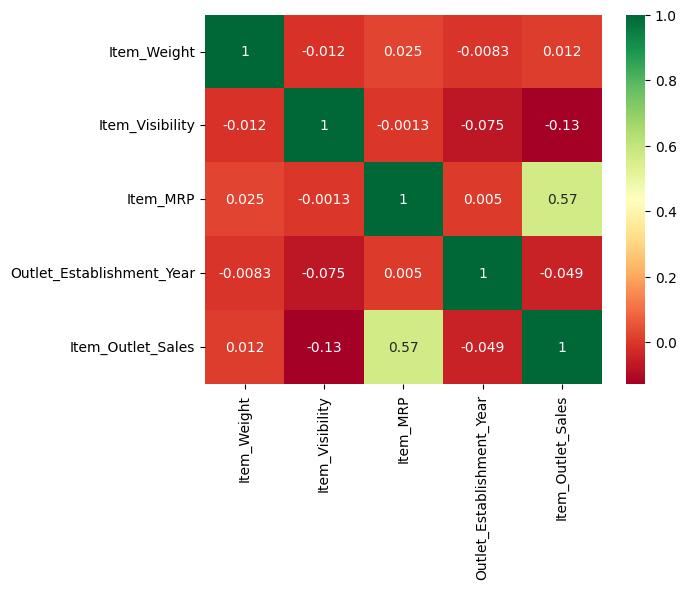

In [31]:
sns.heatmap(corr, cmap = 'RdYlGn', annot = True)

<ipython-input-32-1e1b70502135>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-32-1e1b70502135>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



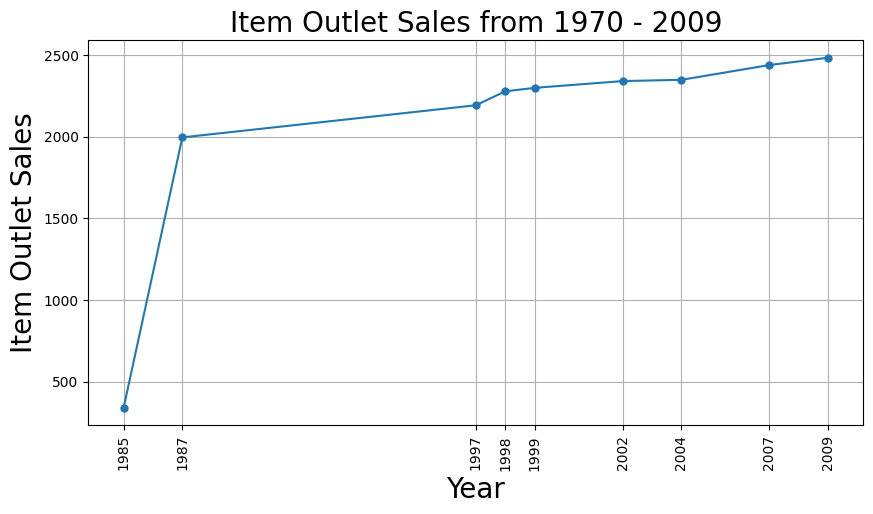

In [32]:
year_group = df.groupby('Outlet_Establishment_Year').mean()
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(year_group.index, year_group['Item_Outlet_Sales'].sort_values(), marker = '.', markersize = 10)
ax.set_title('Item Outlet Sales from 1970 - 2009', fontsize=20);
ax.set_ylabel('Item Outlet Sales', fontsize=20)
ax.set_xlabel("Year", fontsize=20)

ax.set_xticklabels(year_group.index, rotation = 90)
ax.set_xticks(year_group.index)
ax.grid(True)

plt.show()

In [33]:
# Ordinal Encoding

# Outlet Size
outlet_size_dic = {'Small' : 0, 'Medium' : 1, 'High' : 2}
df['Outlet_Size'].replace(outlet_size_dic, inplace =True)

# Outlet Type
outlet_type_dic = {'Supermarket Type1' : 0, 'Supermarket Type2' : 1, 'Supermarket Type3' : 2}
df['Outlet_Type'].replace(outlet_type_dic, inplace =True)

# Outlet Location Type
outlet_loc_type_dic = {'Tier 1' : 0, 'Tier 2' : 1, 'Tier 3' : 2}
df['Outlet_Location_Type'].replace(outlet_loc_type_dic, inplace =True)


Identify the target (X) and features (y), Perform a train test split
* Item_Outlet_sales is the target


In [34]:
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis = 1)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

Create a pre processing pipeline to prepare the dataset for Machine Learning

In [35]:
#create 2 selectors
num_selector = make_column_selector(dtype_include= 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [36]:
#Scaler and OneHotEncoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [37]:
# tuples for column transformer
num_tuple =(scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [38]:
#column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78e7ea5b2d70>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78e7ea5b2f50>)])

In [39]:
preprocessor.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78e7ea5b2d70>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78e7ea5b2f50>)])

In [40]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [42]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584
0,0.819164,-0.712775,1.828109,1.327849,0.287374,1.084948,0.989914,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.558258,-1.291052,0.603369,1.327849,0.287374,1.084948,0.989914,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.129588,1.813319,0.244541,0.136187,0.287374,-1.384777,-0.501724,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.167286,-1.004931,-0.952591,0.732018,-1.384048,-0.149914,-0.501724,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.530729,-0.965484,-0.336460,0.493686,0.287374,-0.149914,-0.501724,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
# Check for missing values and that data is scaled and one-hot encoded
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1585)




array([[ 0.81916441, -0.71277507,  1.82810922, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55825754, -1.29105225,  0.60336888, ...,  0.        ,
         0.        ,  0.        ],
       [-0.12958785,  1.81331864,  0.24454056, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11564949, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76791667, -0.2277552 , -0.38377708, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81916441, -0.95867683, -0.73836105, ...,  0.        ,
         1.        ,  0.        ]])